In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
import matplotlib.pyplot as plt

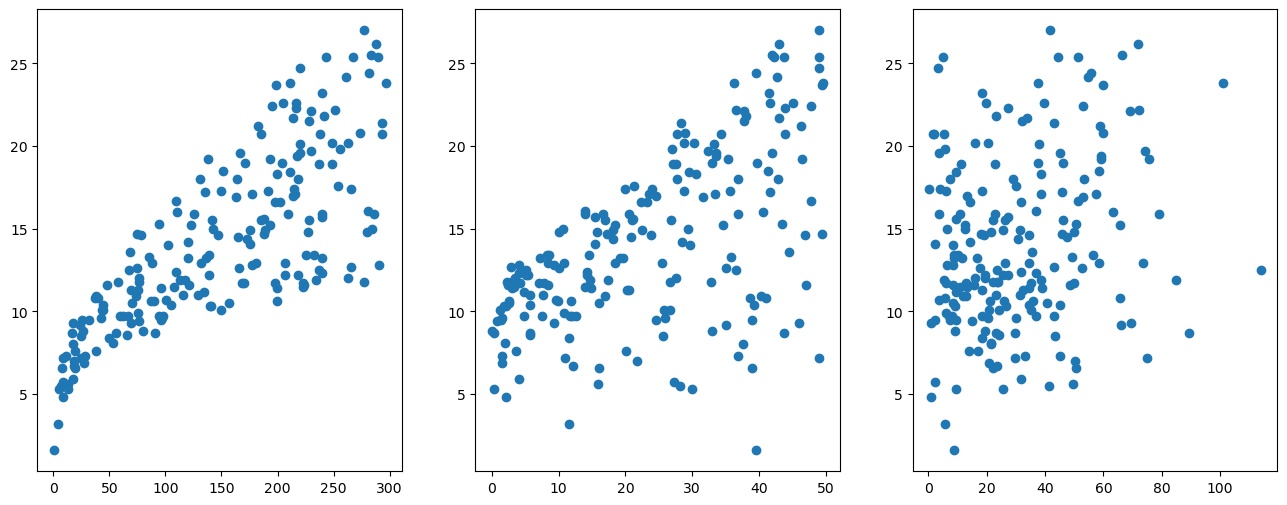

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].scatter(df['TV'], df['sales'])


axes[1].scatter(df['radio'], df['sales'])


axes[2].scatter(df['newspaper'], df['sales'])

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='sales'>

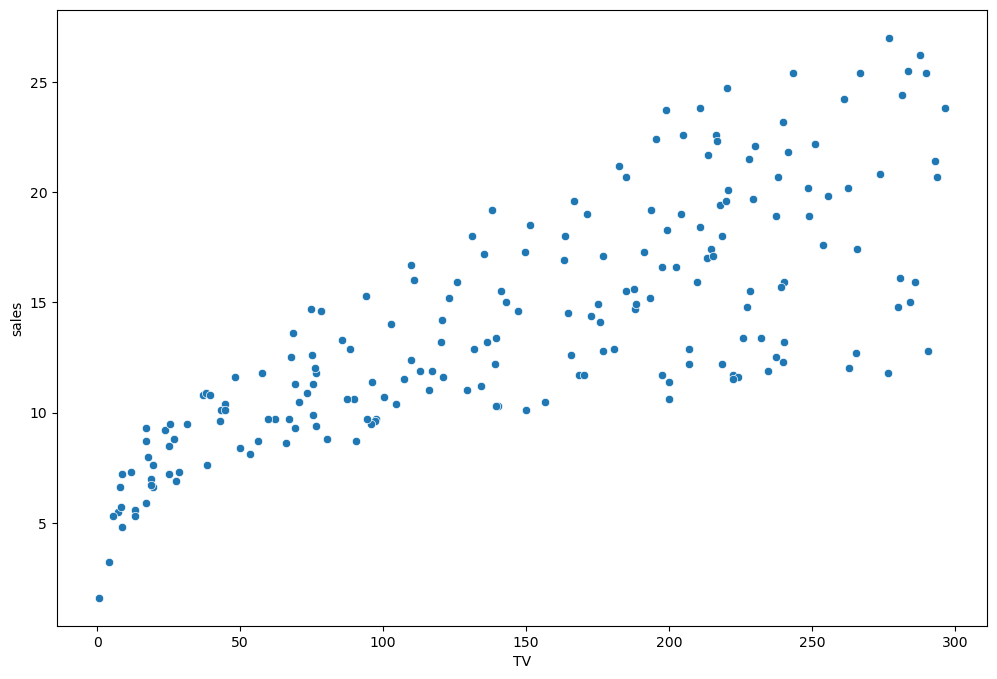

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(x= 'TV' ,y='sales' ,data=df)

In [8]:
X = df.drop('sales', axis = 1)

In [9]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [10]:
y = df['sales']

In [11]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
len(X_train)

134

In [38]:
X_test.loc[[5]]

,TV,radio,newspaper
5,8.7,48.9,75.0


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [39]:
model.predict(X_test.loc[[5]])

array([13.21744723])

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mean_absolute_error(y_test, test_predictions)

1.4937750024728969

In [23]:
mean_squared_error(y_test, test_predictions)

3.7279283306815096

In [24]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.9307843822347202

In [26]:
test_residuals = y_test - test_predictions

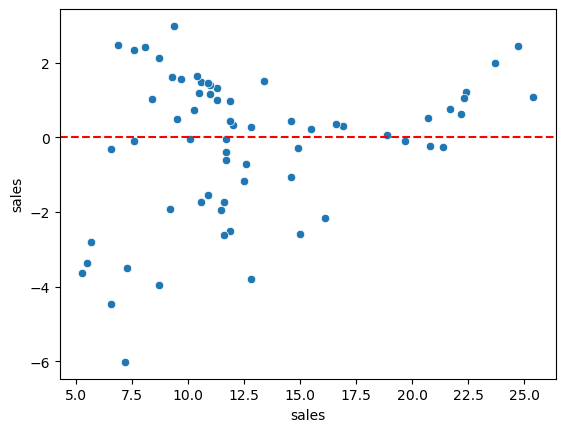

In [28]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

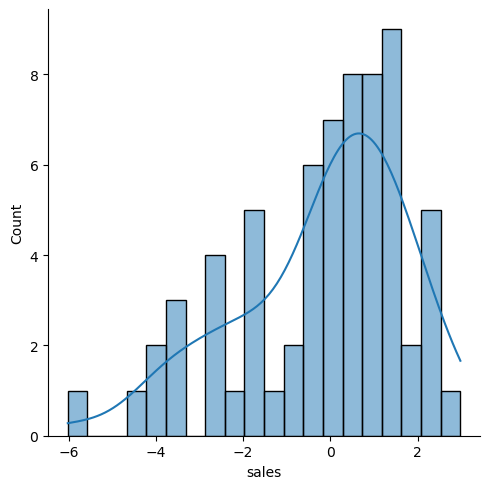

In [31]:
sns.displot(test_residual, bins = 20, kde = True)

In [40]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [41]:
model.coef_

array([0.04466512, 0.19663006, 0.00607439])

In [42]:
from joblib import dump, load

In [43]:
dump(model, 'sales_model.joblib')

['sales_model.joblib']

In [44]:
load_model = load('sales_model.joblib')

In [45]:
load_model.predict(X.loc[[3]])

array([18.0010106])

In [46]:
load_model.coef_

array([0.04466512, 0.19663006, 0.00607439])

In [47]:
load_model.predict([[140, 20, 10]])

/Users/egor/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.00453363])